In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/health_study_dataset.csv")

df.head(3)

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0


### Beskrivande analys
#### 1. Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.


In [ ]:
import pandas as pd

# Läs in CSV-filen 
df = pd.read_csv("data/health_study_dataset.csv")  

# Välj kolumnerna du vill analysera
columns = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']

# Beräkna statistik
stats_df = pd.DataFrame({
    'Mean': df[columns].mean(),
    'Median': df[columns].median(),
    'Min': df[columns].min(),
    'Max': df[columns].max()
})

# Avrunda 
stats_df = stats_df.round(2)

# Visa resultatet
print(stats_df)


               Mean  Median    Min     Max
age           49.43   50.00   18.0   90.00
weight        73.41   73.20   33.7  114.40
height       171.85  171.35  144.4  200.40
systolic_bp  149.18  149.40  106.8  185.90
cholesterol    4.93    4.97    2.5    7.88


#### 2. Tre olika grafer 
- Histogram över blodtryck 
- Boxplot över vikt per kön 
- Stapeldiagram över andelen rökare

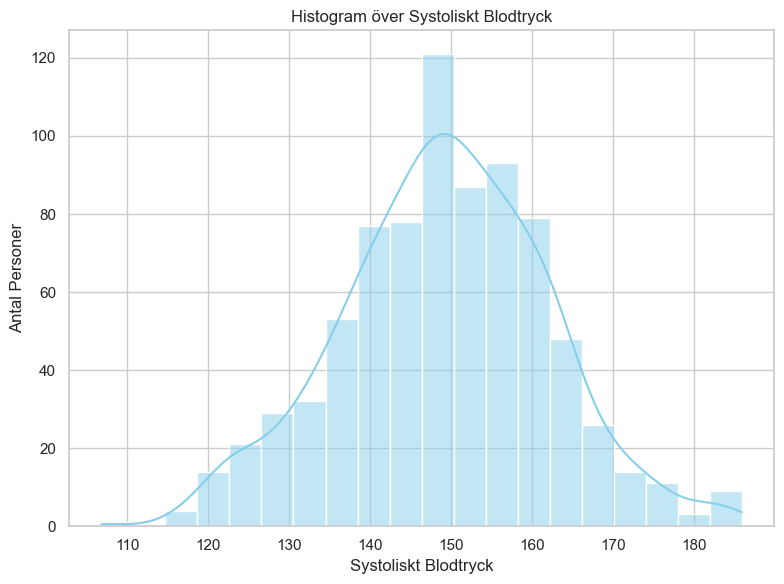

C:\Users\nar\AppData\Local\Temp\ipykernel_2960\1253322323.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='weight', data=df, palette='pastel')


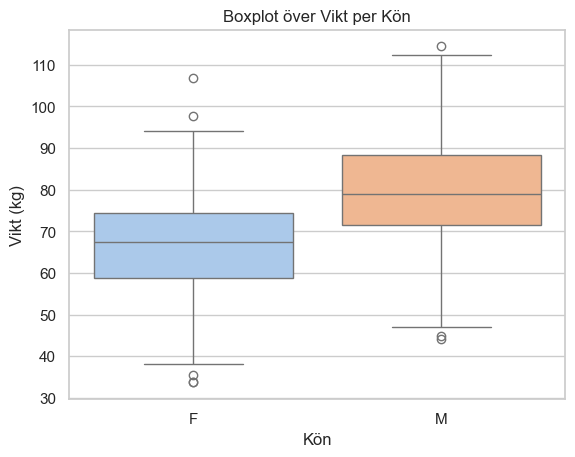

C:\Users\nar\AppData\Local\Temp\ipykernel_2960\1253322323.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoker_counts.index, y=smoker_counts.values, palette='muted')


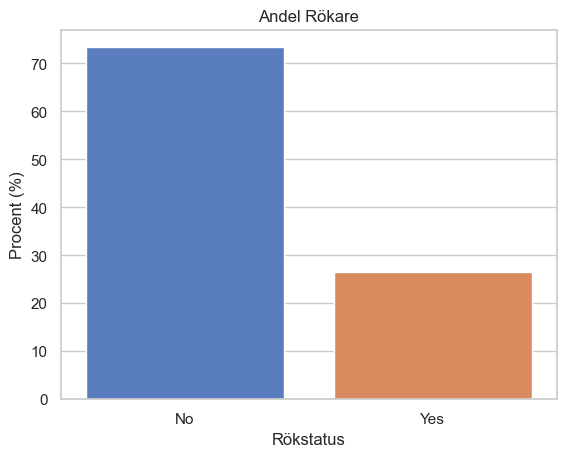

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Läs in din CSV-fil 
df = pd.read_csv("data/health_study_dataset.csv") 

# Ställ in stil
sns.set(style="whitegrid")

# Skapa en figur med 3 grafer
# 1. Histogram över systoliskt blodtryck
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.histplot(df['systolic_bp'], bins=20, kde=True, ax=ax, color='skyblue')
ax.set_title('Histogram över Systoliskt Blodtryck')
ax.set_xlabel('Systoliskt Blodtryck')
ax.set_ylabel('Antal Personer')
plt.tight_layout()
plt.show()

# 2. Boxplot för vikt per kön
sns.boxplot(x='sex', y='weight', data=df, palette='pastel')
plt.title('Boxplot över Vikt per Kön')
plt.xlabel('Kön')
plt.ylabel('Vikt (kg)')
plt.show()

# 3. Stapeldiagram över andelen rökare
smoker_counts = df['smoker'].value_counts(normalize=True) * 100
sns.barplot(x=smoker_counts.index, y=smoker_counts.values, palette='muted')
plt.title('Andel Rökare')
plt.xlabel('Rökstatus')
plt.ylabel('Procent (%)')
plt.show()

# layout
plt.tight_layout()
plt.show()

## Simulering


#### 1. Beräkna andelen personer i datasetet som har sjukdomen.

ca. 94 % personer har inte sjukdomen, ca 6 % har sjukdomen

In [16]:
import pandas as pd

# Läs in filen (justera sökvägen om nödvändigt)
df = pd.read_csv("data/health_study_dataset.csv")

# Beräkna andelen personer med sjukdomen
disease_ratio = df['disease'].value_counts(normalize=True) * 100

print("Andel personer med sjukdomen:")
print(disease_ratio)


Andel personer med sjukdomen:
disease
0    94.125
1     5.875
Name: proportion, dtype: float64


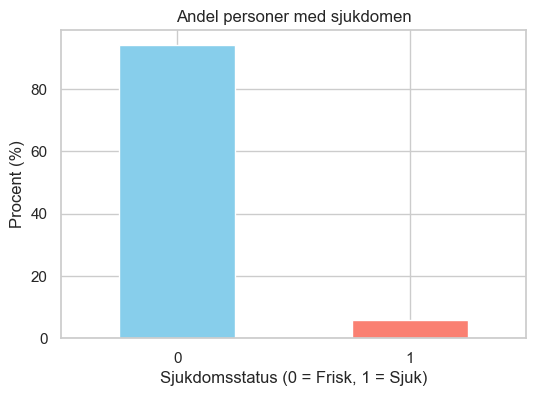

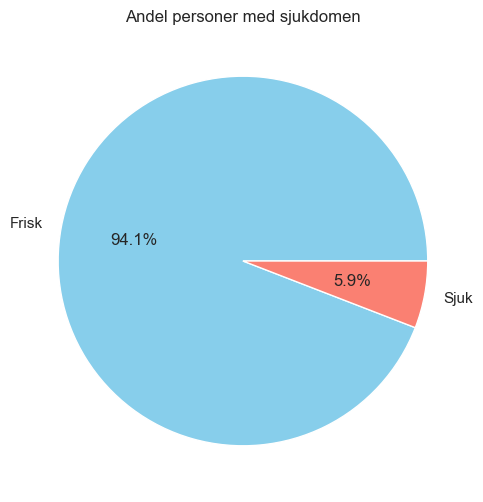

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in din fil (justera sökvägen om nödvändigt)
df = pd.read_csv("data/health_study_dataset.csv")

# Beräkna andelen personer med sjukdomen
disease_counts = df['disease'].value_counts(normalize=True) * 100

# Stapeldiagram
plt.figure(figsize=(6, 4))
disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Andel personer med sjukdomen')
plt.xlabel('Sjukdomsstatus (0 = Frisk, 1 = Sjuk)')
plt.ylabel('Procent (%)')
plt.xticks(rotation=0)
plt.show()

# Cirkeldiagram
plt.figure(figsize=(6, 6))
disease_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Frisk', 'Sjuk'])
plt.title('Andel personer med sjukdomen')
plt.ylabel('')
plt.show()


#### 2. Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.

In [18]:
import pandas as pd
import numpy as np

# Läs in filen
df = pd.read_csv("data/health_study_dataset.csv")

# Beräkna sannolikheten för sjukdom
p_sjuk = df['disease'].mean()  # Om disease är 0/1
print(f"Sannolikhet för sjukdom: {p_sjuk:.4f}")

# Simulera 1000 personer
simulerade = np.random.choice([0, 1], size=1000, p=[1 - p_sjuk, p_sjuk])

# Räkna antal sjuka och friska
antal_frisk = np.sum(simulerade == 0)
antal_sjuk = np.sum(simulerade == 1)

print(f"Av 1000 simulerade personer:")
print(f"Friska: {antal_frisk}")
print(f"Sjuka: {antal_sjuk}")


Sannolikhet för sjukdom: 0.0587
Av 1000 simulerade personer:
Friska: 936
Sjuka: 64


#### 3. Jämför den simulerade andelen med den verkliga andelen i datasetet.

Verklig andel (från datasetet) och  simulerad andel (NumPy)

Verklig andel sjukdom: 5.88%
Simulerad andel sjukdom: 5.10%


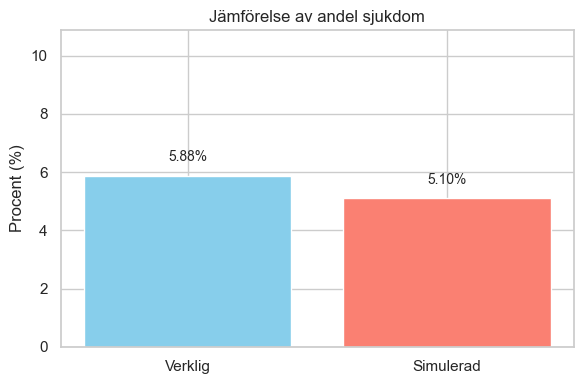

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Läs in datasetet
df = pd.read_csv("data/health_study_dataset.csv")

# Verklig andel sjukdom
p_verklig = df['disease'].mean() * 100
print(f"Verklig andel sjukdom: {p_verklig:.2f}%")

# Simulera 1000 personer baserat på sannolikheten
simulerade = np.random.choice([0, 1], size=1000, p=[1 - p_verklig/100, p_verklig/100])
p_simulerad = (np.sum(simulerade == 1) / 1000) * 100
print(f"Simulerad andel sjukdom: {p_simulerad:.2f}%")

# Jämförelse i stapeldiagram
plt.figure(figsize=(6, 4))
plt.bar(['Verklig', 'Simulerad'], [p_verklig, p_simulerad], color=['skyblue', 'salmon'])
plt.title('Jämförelse av andel sjukdom')
plt.ylabel('Procent (%)')
plt.ylim(0, max(p_verklig, p_simulerad) + 5)
for i, v in enumerate([p_verklig, p_simulerad]):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


2 staplar som jämför verklig vs simulerade andel

### Konfidensintervall

#### 1. Beräknar konfidensintervall med normalapproximation och bootstrap

Antal observationer: 800

Medelvärde: 149.18

95% konfidensintervall:

Normalapproximation CI: 148.29 till 150.07

Bootstrap CI: 148.30 till 150.07

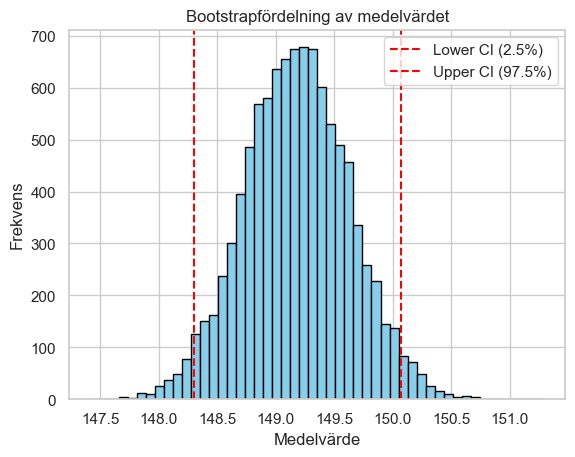

Medelvärde: 149.18
Normalapproximation CI: 148.29 till 150.07
Bootstrap CI: 148.30 till 150.07


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def confidence_intervals(data, n_bootstrap=10000, alpha=0.05):
    """
    Beräknar konfidensintervall med normalapproximation och bootstrap.
    
    Parametrar:
    - data: array eller lista med värden
    - n_bootstrap: antal bootstrap-resamplingar
    - alpha: signifikansnivå (default 0.05 för 95% CI)
    
    Returnerar:
    - mean: medelvärde
    - ci_normal: tuple (lower, upper)
    - ci_bootstrap: tuple (lower, upper)
    """
    data = np.array(data)
    mean = data.mean()
    std = data.std(ddof=1)
    n = len(data)
    z = 1.96  # För 95% CI
    
    # Normalapproximation
    ci_normal = (mean - z * std / np.sqrt(n),
                 mean + z * std / np.sqrt(n))
    
    # Bootstrap
    np.random.seed(42)
    bootstrap_means = [np.mean(np.random.choice(data, size=n, replace=True)) for _ in range(n_bootstrap)]
    ci_bootstrap = (np.percentile(bootstrap_means, 100*alpha/2),
                    np.percentile(bootstrap_means, 100*(1-alpha/2)))
    
    # Visualisering med Matplotlib
    plt.hist(bootstrap_means, bins=50, color='skyblue', edgecolor='black')
    plt.axvline(ci_bootstrap[0], color='red', linestyle='--', label=f'Lower CI ({alpha/2*100:.1f}%)')
    plt.axvline(ci_bootstrap[1], color='red', linestyle='--', label=f'Upper CI ({(1-alpha/2)*100:.1f}%)')
    plt.title('Bootstrapfördelning av medelvärdet')
    plt.xlabel('Medelvärde')
    plt.ylabel('Frekvens')
    plt.legend()
    plt.show()
    
    return mean, ci_normal, ci_bootstrap

df = pd.read_csv("data/health_study_dataset.csv")
bp = df['systolic_bp'].dropna()
mean, ci_normal, ci_bootstrap = confidence_intervals(bp)

print(f"Medelvärde: {mean:.2f}")
print(f"Normalapproximation CI: {ci_normal[0]:.2f} till {ci_normal[1]:.2f}")
print(f"Bootstrap CI: {ci_bootstrap[0]:.2f} till {ci_bootstrap[1]:.2f}")




## Hypotesprövning


#### 1. Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”

Nollhypotes (H₀): Ingen skillnad i medelblodtryck mellan rökare och icke-rökare.
Alternativ hypotes (H₁): Rökare har högre medelblodtryck.

Resultat:

p-värde = 0.326 → vi kan inte förkasta H₀.

Effektstorlek ≈ 0 → skillnaden är praktiskt obetydlig.

Konfidensintervallet inkluderar 0 → ingen säker skillnad.

Power är låg → studien är underdimensionerad.

Slutsats: Det finns ingen statistiskt signifikant evidens för att rökare har högre blodtryck än icke-rökare i ditt dataset.

Rökare:
    Medelvärde: 149.52
    95% CI: (147.73, 151.32)
    
Icke-rökare:
    Medelvärde: 149.05
    95% CI: (148.03, 150.08)

Slutsats:
    Skillnaden är liten och konfidensintervallen överlappar.
    

In [21]:
import pandas as pd
import pingouin as pg

df = pd.read_csv("data/health_study_dataset.csv")

# T-test
result = pg.ttest(x=df[df["smoker"]=="Yes"]["systolic_bp"],
                  y=df[df["smoker"]=="No"]["systolic_bp"],
                  alternative='greater')  # ensidigt test
print(result)


               T        dof alternative     p-val         CI95%   cohen-d  \
T-test  0.450343  360.15255     greater  0.326367  [-1.26, inf]  0.036868   

         BF10    power  
T-test  0.197  0.11814  


Rapport i PDF

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Läs in data
df = pd.read_csv("data/health_study_dataset.csv")

# Grupper
smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
nonsmokers = df[df["smoker"] == "No"]["systolic_bp"]

# Beräkna medelvärden och konfidensintervall
def mean_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = stats.t.ppf((1 + confidence) / 2, len(data) - 1) * sem
    return mean, mean - margin, mean + margin

sm_mean, sm_low, sm_high = mean_ci(smokers)
ns_mean, ns_low, ns_high = mean_ci(nonsmokers)

# Skapa graf med konfidensintervall
fig, ax = plt.subplots(figsize=(6, 4))
groups = ["Rökare", "Icke-rökare"]
means = [sm_mean, ns_mean]
ci_lows = [sm_low, ns_low]
ci_highs = [sm_high, ns_high]

ax.bar(groups, means, yerr=[means[0]-ci_lows[0], means[1]-ci_lows[1]], capsize=10, color=["orange", "blue"])
ax.set_ylabel("Systoliskt blodtryck")
ax.set_title("Medelvärde med 95% konfidensintervall")

# Exportera till PDF
with PdfPages("rapport_blodtryck.pdf") as pdf:
    pdf.savefig(fig)
    plt.close(fig)

    # Lägg till text-sida
    fig_text = plt.figure(figsize=(8, 6))
    text = f"""
    Rapport: Skillnad i systoliskt blodtryck mellan rökare och icke-rökare

    Rökare:
    Medelvärde: {sm_mean:.2f}
    95% CI: ({sm_low:.2f}, {sm_high:.2f})

    Icke-rökare:
    Medelvärde: {ns_mean:.2f}
    95% CI: ({ns_low:.2f}, {ns_high:.2f})

    Slutsats:
    Skillnaden är liten och konfidensintervallen överlappar.
    """
    plt.text(0.1, 0.5, text, fontsize=12)
    plt.axis("off")
    pdf.savefig(fig_text)
    plt.close(fig_text)

print("PDF-rapport skapad: rapport_blodtryck.pdf")


PDF-rapport skapad: rapport_blodtryck.pdf


In [ ]:

import scipy
print(scipy.__version__)


### 2 + 3 Slutsats: Hypotesprövning med Bootstrap 

Det finns ingen evidens för att rökare har högre systoliskt blodtryck än icke-rökare.

H₀ (nollhypotes): Rökare har inte högre medelvärde av systoliskt blodtryck än icke-rökare.

H₁ (alternativ hypotes): Rökare har högre medelvärde av systoliskt blodtryck än icke-rökare.

- Observerad skillnad i medelvärde: ≈ 0.47 mmHg
- p-värde (ensidigt, bootstrap): ≈ 0.33
- 95% konfidensintervall för skillnaden: (-1.59, 2.53)

Eftersom p-värdet > 0.05 kan vi inte förkasta nollhypotesen.

Konfidensintervallet inkluderar noll, vilket betyder att skillnaden inte är statistiskt signifikant.

Den observerade skillnaden är mycket liten och praktiskt taget obetydlig.


In [23]:
import pandas as pd
import numpy as np

# Läs in data
df = pd.read_csv("data/health_study_dataset.csv")

# Grupper
smokers = df[df["smoker"] == "Yes"]["systolic_bp"].values
nonsmokers = df[df["smoker"] == "No"]["systolic_bp"].values

# Beräkna observerad skillnad i medelvärde
obs_diff = np.mean(smokers) - np.mean(nonsmokers)

# Bootstrap-parametrar
n_boot = 10000
np.random.seed(42)

# Kombinera data för permutationstest
combined = np.concatenate([smokers, nonsmokers])
n_smokers = len(smokers)

# Bootstrap-simulering
bootstrap_diffs = []
for _ in range(n_boot):
    sample_smokers = np.random.choice(smokers, size=n_smokers, replace=True)
    sample_nonsmokers = np.random.choice(nonsmokers, size=len(nonsmokers), replace=True)
    bootstrap_diffs.append(np.mean(sample_smokers) - np.mean(sample_nonsmokers))

# Beräkna p-värde (ensidigt test: rökare > icke-rökare)
p_value = np.mean(np.array(bootstrap_diffs) >= obs_diff)

# Resultat
print(f"Observerad skillnad i medelvärde: {obs_diff:.2f}")
print(f"p-värde (bootstrap, ensidigt): {p_value:.4f}")

# Konfidensintervall för skillnaden
ci_low, ci_high = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"95% CI för skillnaden: ({ci_low:.2f}, {ci_high:.2f})")


Observerad skillnad i medelvärde: 0.47
p-värde (bootstrap, ensidigt): 0.5050
95% CI för skillnaden: (-1.63, 2.51)
